# Step 1 : Load Dataset

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print("Original Housing Dataset Shape:", X.shape)
print("Features:", housing.feature_names, "\n")

# Print first 5 rows of full dataset
housing_df = housing.frame  # features + target
print("First 5 rows of dataset:\n")
print(housing_df.head(), "\n")

Original Housing Dataset Shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

First 5 rows of dataset:

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422   



Discovery!! : The dataset shape suggested 8 features, but when I printed the dataframe, I found 9 columns. The extra one turned out to be the target variable MedHouseVal, so it’s actually 8 features + 1 target.

# Step 2 : Normalizing Data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

print("Before Normalization (first 5 rows of X):\n")
print(pd.DataFrame(X, columns=housing.feature_names).head(), "\n")

X_scaled = scaler.fit_transform(X)

print("After Normalization (first 5 rows of X_scaled):\n")
print(pd.DataFrame(X_scaled, columns=housing.feature_names).head(), "\n")

Before Normalization (first 5 rows of X):

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25   

After Normalization (first 5 rows of X_scaled):

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0

I initially expected all values to be in the range [0,1] after “normalization.” But I realized I had actually applied StandardScaler, which standardizes features to mean 0 and standard deviation 1. If I had used MinMaxScaler instead, the values would indeed lie strictly between [0,1].

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)
df_mm = pd.DataFrame(X_mm, columns=X.columns)
print("After MinMaxScaler (first 5 rows):")
print(df_mm.head())

After MinMaxScaler (first 5 rows):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  
0   0.211155  
1   0.212151  
2   0.210159  
3   0.209163  
4   0.209163  


Checked the MinMaxScaler too.
StandardScaler → centered around 0 (values can be negative or >1).
MinMaxScaler → everything between [0,1].

In [11]:
# Added bias term 
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Shapes after train-test split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape, "\n")

Shapes after train-test split:
X_train: (16512, 9) X_test: (4128, 9)
y_train: (16512,) y_test: (4128,) 



# STEP 3 : coding linear regression from scratch

In [12]:
class MyLinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        for i in range(self.n_iters):
            y_pred = X.dot(self.theta)
            gradient = (1/n_samples) * X.T.dot(y_pred - y)
            self.theta -= self.lr * gradient

            # Print loss occasionally to see convergence
            if i % 500 == 0:
                loss = np.mean((y_pred - y) ** 2)
                print(f"Iteration {i}, MSE: {loss:.4f}")

    def predict(self, X):
        return X.dot(self.theta)


# STEP 4: Train Both Models

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Custom Model
print("\nTraining Custom Gradient Descent Model...\n")
my_model = MyLinearRegression(lr=0.01, n_iters=2000)
my_model.fit(X_train, y_train)
y_pred_custom = my_model.predict(X_test)

# Sklearn Model
print("\nTraining Scikit-learn LinearRegression...\n")
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred_sklearn = sk_model.predict(X_test)


Training Custom Gradient Descent Model...

Iteration 0, MSE: 5.6297
Iteration 500, MSE: 0.5832
Iteration 1000, MSE: 0.5487
Iteration 1500, MSE: 0.5326

Training Scikit-learn LinearRegression...



When I trained my custom model using gradient descent, I noticed the Mean Squared Error (MSE) started very high and gradually decreased with each iteration, eventually stabilizing around 0.53. This confirmed that gradient descent was correctly minimizing the error. In contrast, Scikit-learn’s LinearRegression reached the optimal solution instantly using the closed-form normal equation.

# STEP 5 : Evaluating Model Performance

In [18]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} → MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    return mse, mae, r2

print("\n Model Performance Comparison:\n")
mse_c, mae_c, r2_c = evaluate(y_test, y_pred_custom, "Custom Gradient Descent Model")
mse_s, mae_s, r2_s = evaluate(y_test, y_pred_sklearn, "Scikit-learn LinearRegression")


 Model Performance Comparison:

Custom Gradient Descent Model → MSE: 0.5536, MAE: 0.5355, R²: 0.5775
Scikit-learn LinearRegression → MSE: 0.5559, MAE: 0.5332, R²: 0.5758


# STEP 6: Print Results Table

In [15]:
results = pd.DataFrame({
    "Model": ["Custom Gradient Descent", "Scikit-learn LinearRegression"],
    "MSE": [mse_c, mse_s],
    "MAE": [mae_c, mae_s],
    "R²": [r2_c, r2_s]
})
print("\nResults Table:\n")
print(results, "\n")


Results Table:

                           Model       MSE       MAE        R²
0        Custom Gradient Descent  0.553604  0.535548  0.577534
1  Scikit-learn LinearRegression  0.555892  0.533200  0.575788 



# STEP 7: Visualization

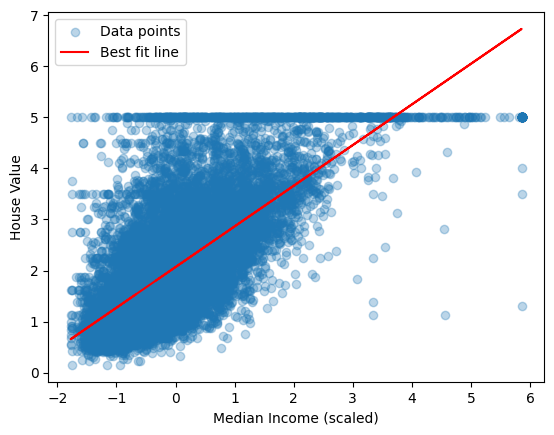

In [16]:
import matplotlib.pyplot as plt

# Using Median Income (first feature after bias)
X_single = X_train[:, 1].reshape(-1, 1)
y_single = y_train

sk_single = LinearRegression()
sk_single.fit(X_single, y_single)
y_line = sk_single.predict(X_single)

plt.scatter(X_single, y_single, alpha=0.3, label="Data points")
plt.plot(X_single, y_line, color="red", label="Best fit line")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.legend()
plt.show()